# Library

In [4]:
# load libraries
from pathlib import Path
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
methods = ['velocyto',
           'scvelo_dyn',
           'scvelo_stc',
           'veloae',
           'dynamo_m1',
           'unitvelo_ind',
           'unitvelo_uni',
           'velovae_std',
           'velovae_fullvb',
           'deepvelo',
           'celldancer',
           'pyrovelocity_m1',
           'pyrovelocity_m2',
           'kvelo',
           'velovi',
           'sdevelo',
           'cell2fate',
           'svelvetvae', 
           'latentvelo_std',
           'tivelo_std', 
           'tivelo_simple', 
           'sctour_mse',
           'sctour_nb', 
           'sctour_zinb', 
           'graphvelo_std',
           'dynamo_m2',
           'velvetvae']

newmethods = {
    'unitvelo_ind': 'UniTVelo (ind)',
    'velovi': 'VeloVI',
    'cell2fate': 'cell2fate',
    'latentvelo_std': 'LatentVelo (std)',
    'pyrovelocity_m1': 'Pyro-velocity (m1)',
    'pyrovelocity_m2': 'Pyro-velocity (m2)',
    'sctour_mse': 'scTour (MSE)',
    'sctour_nb': 'scTour (NB)',
    'sctour_zinb': 'scTour (ZINB)',
    'scvelo_dyn': 'scVelo (dyn)',
    'unitvelo_uni': 'UniTVelo (uni)',
    'deepvelo': 'DeepVelo',
    'svelvetvae': 'SvelvetVAE',
    'tivelo_std': 'TIVelo (std)',
    'tivelo_simple': 'TIVelo (simple)',
    'velocyto': 'Velocyto',
    'veloae': 'VeloAE',
    'velovae_std': 'VeloVAE',
    'velovae_fullvb': 'VeloVAE (Full VB)',
    'kvelo': '$\kappa$-velo',
    'celldancer': 'cellDancer',
    'dynamo': 'Dynamo (m1)',
    'graphvelo_std': 'GraphVelo (std)',
    'scvelo_stc': 'scVelo (stc)',
    'sdevelo': 'SDEvelo',
    'dynamo': 'Dynamo (m2)',
    'velvetvae': 'VelvetVAE'

}


dataset_names = ['data05','data20']
dataset_ids = ['Data 5','Data 20']

# CBDir

In [6]:
metric = 'cbdir'

# 读取各个数据
all_dfs = []
for dataset_name in dataset_names:
    df = pd.read_csv(f'{dataset_name}/{metric}_df.csv')
    all_dfs.append(df)

# 计算每个方法的平均的平均，按照平均的平均进行排序得到rank
method_avg_df = pd.DataFrame()

for i, df in enumerate(all_dfs):
    df = df[df['Method'] != 'svelvetvae_with_smooth'].reset_index(drop=True)

    # 获取除'method'列外的所有列（假设这些是不同fold的值）
    fold_columns = [col for col in df.columns if col != 'Method']
    
    # 计算每个方法在当前数据集上的平均值
    method_avg = df.groupby('Method')[fold_columns].mean().mean(axis=1).reset_index()
    method_avg.columns = ['Method', f'{dataset_names[i]}_avg']
    
    if method_avg_df.empty:
        method_avg_df = method_avg
    else:
        method_avg_df = method_avg_df.merge(method_avg, on='Method', how='outer')

method_avg_df['overall_avg'] = method_avg_df.iloc[:, 1:].mean(axis=1)
method_avg_df = method_avg_df.sort_values('overall_avg', ascending=False).reset_index(drop=True)
method_avg_df['rank'] = range(1, len(method_avg_df) + 1)

In [7]:
method_avg_df

,Method,data05_avg,data20_avg,overall_avg,rank
0,pyrovelocity_m1,0.257855,0.132621,0.195238,1
1,pyrovelocity_m2,0.122317,0.122907,0.122612,2
2,dynamo_m2,0.242398,-0.013580,0.114409,3
3,velovi,0.116649,0.102596,0.109623,4
4,velovae_fullvb,0.149548,0.064254,0.106901,5
5,velovae_std,0.213790,-0.008615,0.102588,6
6,graphvelo_std,-0.075510,0.268284,0.096387,7
7,svelvetvae,0.137391,-0.041128,0.048132,8
8,unitvelo_ind,0.003029,0.093108,0.048069,9
9,scvelo_stc,0.136729,-0.083808,0.026460,10


/tmp/ipykernel_77361/2625003230.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


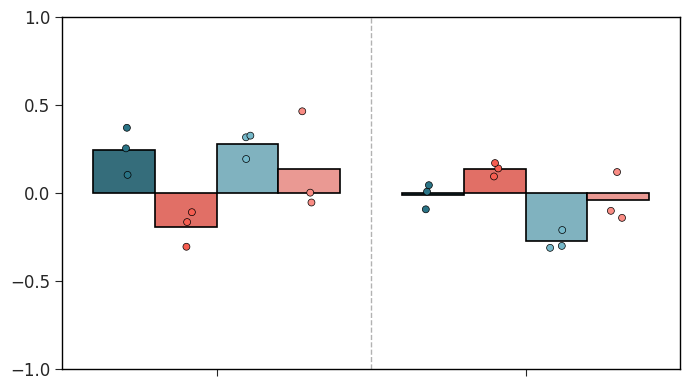

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
sns.set_style("white")

methods_to_plot = ["dynamo_m2","dynamo_m1","velvetvae","svelvetvae"]

new_methods = {
    'dynamo_m2': 'Dynamo (m2) (Rank 3)',
    'dynamo_m1': 'Dynamo (m1) (Rank 16)',
    'velvetvae': 'VelvetVAE (Rank 12)',
    'svelvetvae': 'SvelvetVAE (Rank 8)'
}

method_color = {
    'dynamo_m2': "#2A7486",
    'dynamo_m1':  "#F65E51",
    'velvetvae': "#76B8C9",
    'svelvetvae':  '#F98C84'
}

combined = []
for idx, df in enumerate(all_dfs):
    tmp = df.melt(id_vars='Method', var_name='Fold', value_name='Metric').copy()
    tmp['Dataset'] = f"Dataset {idx+1}"
    combined.append(tmp)
combined_df = pd.concat(combined, ignore_index=True)

combined_df = combined_df[combined_df['Method'].isin(methods_to_plot)].copy()
combined_df['Method'] = pd.Categorical(combined_df['Method'], categories=methods_to_plot, ordered=True)
combined_df['Dataset'] = pd.Categorical(
    combined_df['Dataset'],
    categories=[f"Dataset {i+1}" for i in range(len(all_dfs))],
    ordered=True
)

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, palette=method_color,
    ci=None, dodge=True, edgecolor='black', linewidth=1.2, ax=ax
)

sns.stripplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, dodge=True, palette=method_color,
    marker='o', size=5, edgecolor='black', linewidth=0.5, alpha=1.0, ax=ax
)

ax.legend().remove()
ax.xaxis.set_tick_params(which='both', bottom=True)
ax.yaxis.set_tick_params(which='both', left=True)
num_datasets = len(all_dfs)
for i in range(num_datasets - 1):
    ax.axvline(i + 0.5, color='gray', linestyle='--', linewidth=1, alpha=0.6, zorder=0)

handles = [Patch(facecolor=method_color[m], edgecolor='black', label=new_methods[m]) for m in methods_to_plot]
legend = ax.legend(handles=handles, title="", loc='upper center', bbox_to_anchor=(0.5, -0.15),
                   ncol=4, frameon=True, fontsize=9)
ax.add_artist(legend)

ax.set_xlabel("")
ax.set_ylabel("", fontsize=12)
ax.set_xticklabels([])

ax.set_ylim(-1, 1)
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
for label in ax.get_yticklabels():
    label.set_fontsize(12)

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# ax.grid(True, linestyle='--', axis='y', color='lightgray', alpha=0.7, zorder=0)
ax.tick_params(axis='both', length=5)
plt.tight_layout(rect=[0,0,1,1])
plt.savefig(f"labeled_subset_{metric}.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()


# Spearman

In [9]:
methods = ['velocyto',
           'scvelo_dyn',
           'scvelo_stc',
           'veloae',
           'dynamo_m1',
           'unitvelo_ind',
           'unitvelo_uni',
           'velovae_std',
           'velovae_fullvb',
           'deepvelo',
           'celldancer',
           'pyrovelocity_m1',
           'pyrovelocity_m2',
           'kvelo',
           'velovi',
           'sdevelo',
           'cell2fate',
           'svelvetvae', 
           'latentvelo_std',
           'tivelo_std', 
           'tivelo_simple', 
           'sctour_mse',
           'sctour_nb', 
           'sctour_zinb', 
           'graphvelo_std',
           'dynamo_m2',
           'velvetvae']

newmethods = {
    'unitvelo_ind': 'UniTVelo (ind)',
    'velovi': 'VeloVI',
    'cell2fate': 'cell2fate',
    'latentvelo_std': 'LatentVelo (std)',
    'pyrovelocity_m1': 'Pyro-velocity (m1)',
    'pyrovelocity_m2': 'Pyro-velocity (m2)',
    'sctour_mse': 'scTour (MSE)',
    'sctour_nb': 'scTour (NB)',
    'sctour_zinb': 'scTour (ZINB)',
    'scvelo_dyn': 'scVelo (dyn)',
    'unitvelo_uni': 'UniTVelo (uni)',
    'deepvelo': 'DeepVelo',
    'svelvetvae': 'SvelvetVAE',
    'tivelo_std': 'TIVelo (std)',
    'tivelo_simple': 'TIVelo (simple)',
    'velocyto': 'Velocyto',
    'veloae': 'VeloAE',
    'velovae_std': 'VeloVAE',
    'velovae_fullvb': 'VeloVAE (Full VB)',
    'kvelo': '$\kappa$-velo',
    'celldancer': 'cellDancer',
    'dynamo': 'Dynamo (m1)',
    'graphvelo_std': 'GraphVelo (std)',
    'scvelo_stc': 'scVelo (stc)',
    'sdevelo': 'SDEvelo',
    'dynamo': 'Dynamo (m2)',
    'velvetvae': 'VelvetVAE'

}

dataset_names = ['data06','data19']
dataset_ids = ['Data 6','Data 19']

In [10]:
metric = 'spearman'

# 读取各个数据
all_dfs = []
for dataset_name in dataset_names:
    df = pd.read_csv(f'{dataset_name}/{metric}_df.csv')
    all_dfs.append(df)

method_avg_df = pd.DataFrame()

for i, df in enumerate(all_dfs):
    fold_columns = [col for col in df.columns if col != 'Method']
    
    method_avg = df.groupby('Method')[fold_columns].mean().mean(axis=1).reset_index()
    method_avg.columns = ['Method', f'{dataset_names[i]}_avg']
    
    if method_avg_df.empty:
        method_avg_df = method_avg
    else:
        method_avg_df = method_avg_df.merge(method_avg, on='Method', how='outer')

method_avg_df['overall_avg'] = method_avg_df.iloc[:, 1:].mean(axis=1)
method_avg_df = method_avg_df.sort_values('overall_avg', ascending=False).reset_index(drop=True)
method_avg_df['rank'] = range(1, len(method_avg_df) + 1)

In [11]:
method_avg_df

,Method,data06_avg,data19_avg,overall_avg,rank
0,velocyto,0.747779,0.637552,0.692666,1
1,graphvelo_std,0.409586,0.710353,0.559969,2
2,dynamo_m1,0.729778,0.369536,0.549657,3
3,scvelo_stc,0.695228,0.281893,0.488561,4
4,veloae,0.194535,0.779163,0.486849,5
5,celldancer,0.387093,0.424088,0.405590,6
6,unitvelo_uni,0.557688,0.242406,0.400047,7
7,kvelo,0.305799,0.471577,0.388688,8
8,deepvelo,0.733786,-0.114901,0.309442,9
9,scvelo_dyn,0.238590,0.308195,0.273393,10


/tmp/ipykernel_77361/1315085302.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


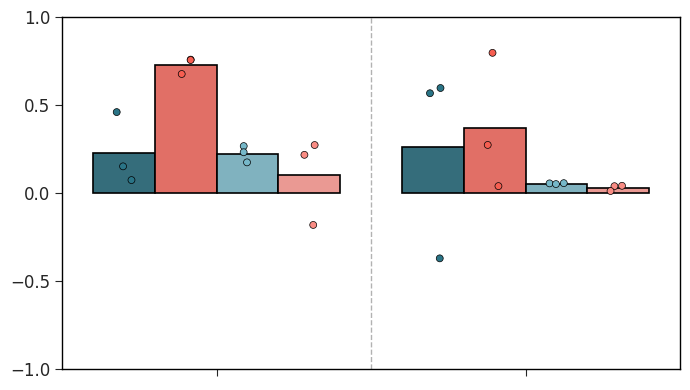

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
sns.set_style("white")

methods_to_plot = ["dynamo_m2","dynamo_m1","velvetvae","svelvetvae"]

new_methods = {
    'dynamo_m2': 'Dynamo (m2) (Rank 11)',
    'dynamo_m1': 'Dynamo (m1) (Rank 3)',
    'velvetvae': 'VelvetVAE (Rank 14)',
    'svelvetvae': 'SvelvetVAE (Rank 16)'
}

method_color = {
    'dynamo_m2': "#2A7486",
    'dynamo_m1':  "#F65E51",
    'velvetvae': "#76B8C9",
    'svelvetvae':  '#F98C84',
}

combined = []
for idx, df in enumerate(all_dfs):
    tmp = df.melt(id_vars='Method', var_name='Fold', value_name='Metric').copy()
    tmp['Dataset'] = f"Dataset {idx+1}"
    combined.append(tmp)
combined_df = pd.concat(combined, ignore_index=True)

combined_df = combined_df[combined_df['Method'].isin(methods_to_plot)].copy()
combined_df['Method'] = pd.Categorical(combined_df['Method'], categories=methods_to_plot, ordered=True)
combined_df['Dataset'] = pd.Categorical(
    combined_df['Dataset'],
    categories=[f"Dataset {i+1}" for i in range(len(all_dfs))],
    ordered=True
)

fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, palette=method_color,
    ci=None, dodge=True, edgecolor='black', linewidth=1.2, ax=ax
)

sns.stripplot(
    x='Dataset', y='Metric', hue='Method', data=combined_df,
    hue_order=methods_to_plot, dodge=True, palette=method_color,
    marker='o', size=5, edgecolor='black', linewidth=0.5, alpha=1.0, ax=ax
)

ax.legend().remove()
ax.xaxis.set_tick_params(which='both', bottom=True)
ax.yaxis.set_tick_params(which='both', left=True)

num_datasets = len(all_dfs)
for i in range(num_datasets - 1):
    ax.axvline(i + 0.5, color='gray', linestyle='--', linewidth=1, alpha=0.6, zorder=0)


handles = [Patch(facecolor=method_color[m], edgecolor='black', label=new_methods[m]) for m in methods_to_plot]
legend = ax.legend(handles=handles, title="", loc='upper center', bbox_to_anchor=(0.5, -0.15),
                   ncol=4, frameon=True, fontsize=9)
ax.add_artist(legend)


ax.set_xlabel("")
ax.set_ylabel("", fontsize=12, fontweight='bold')
ax.set_xticklabels([])

ax.set_ylim(-1, 1)
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
for label in ax.get_yticklabels():
    # label.set_fontweight('bold')
    label.set_fontsize(12)

for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.0)

# ax.grid(True, linestyle='--', axis='y', color='lightgray', alpha=0.7, zorder=0)
ax.tick_params(axis='both', length=5) 
plt.tight_layout(rect=[0,0,1,1])
plt.savefig(f"labeled_subset_{metric}.svg", format="svg", bbox_inches="tight", dpi=300)
plt.show()
